<a href="https://colab.research.google.com/github/usshaa/Deep-Learning-For-all/blob/main/Module_5_Recurrent_Neural_Networks_(RNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Module 5: Recurrent Neural Networks (RNNs) 🚀**  

### 🎯 **Learning Objectives**  
- Understand **Sequential Data** and how RNNs process it.  
- Learn about the **Vanishing Gradient Problem** in RNNs.  
- Explore **LSTMs (Long Short-Term Memory Networks)** and **GRUs (Gated Recurrent Units)**.  
- Understand the **Attention Mechanism & Transformer Networks**.  
- Implement **Applications like Text Generation & Machine Translation**.  

---

## **🔹 1. Understanding Sequential Data**  
Unlike traditional neural networks that process **independent** data points, **RNNs** process sequential data, such as:
- **Time series data** (stock prices, weather forecasting).  
- **Natural Language Processing (NLP)** (text, speech, translations).  
- **Audio & Speech Processing** (voice assistants, music generation).  

✅ **Example: Sequential Data in Python**  


In [208]:
import numpy as np

# Example sequence: Stock prices over 5 days
sequence = np.array([100, 102, 105, 107, 110])
print("Sequential Data:", sequence)

Sequential Data: [100 102 105 107 110]


✅ **Key Concept**: Each value **depends on previous values** in the sequence.  

---

## **🔹 2. Vanishing Gradient Problem in RNNs**  
- **Issue**: Traditional RNNs struggle with **long sequences** because gradients **become too small** during backpropagation.  
- **Effect**: RNNs forget long-term dependencies.  
- **Solution**: Use **LSTMs** and **GRUs**, which have mechanisms to retain long-term dependencies.  

✅ **Visualization of Vanishing Gradient**  


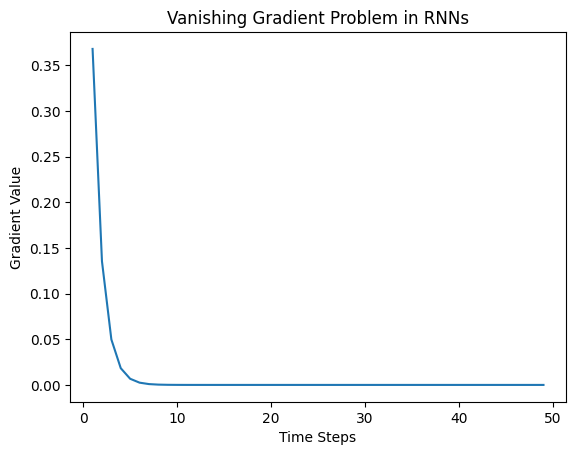

In [209]:
import numpy as np
import matplotlib.pyplot as plt

timesteps = np.arange(1, 50)
gradients = np.exp(-timesteps)  # Simulating vanishing gradients

plt.plot(timesteps, gradients)
plt.xlabel("Time Steps")
plt.ylabel("Gradient Value")
plt.title("Vanishing Gradient Problem in RNNs")
plt.show()

## **🔹 3. LSTMs (Long Short-Term Memory Networks)**
LSTMs solve the vanishing gradient problem using **gates** to control memory retention.  

✅ **LSTM Structure**:  
- **Forget Gate**: Decides what information to discard.  
- **Input Gate**: Determines what new information to store.  
- **Cell State**: Maintains long-term memory.  
- **Output Gate**: Produces the final output.  

✅ **Example: LSTM Model in TensorFlow**  


In [210]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [211]:
# Create LSTM Model
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(10, 1)),
    LSTM(50, activation='tanh'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [212]:
# Compile Model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

✅ **Explanation:**  
- `LSTM(50)` → 50 memory cells.  
- `return_sequences=True` → Returns all timesteps (for stacked LSTMs).  
- `input_shape=(10, 1)` → 10 timesteps per sample, 1 feature per step.  

---

## **🔹 4. GRUs (Gated Recurrent Units)**  
GRUs simplify LSTMs by combining **Forget & Input Gates** into a **single Update Gate**.  

✅ **Differences Between LSTM & GRU**  
| Feature | LSTM | GRU |
|---------|------|-----|
| **Number of Gates** | 3 (Forget, Input, Output) | 2 (Update, Reset) |
| **Memory Cells** | Yes | No |
| **Training Speed** | Slower | Faster |
| **Performance** | Better for long sequences | Good for shorter sequences |

✅ **Example: GRU Model in TensorFlow**  


In [213]:
from tensorflow.keras.layers import GRU

In [214]:
# Create GRU Model
model = Sequential([
    GRU(50, activation='tanh', return_sequences=True, input_shape=(10, 1)),
    GRU(50, activation='tanh'),
    Dense(1)
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

## **🔹 5. Attention Mechanism & Transformer Networks**
Traditional RNNs and LSTMs process sequences **step-by-step**, which limits parallelization. **Attention Mechanisms** solve this by:  
- Allowing the model to **focus** on important parts of the sequence.  
- Improving performance in **Machine Translation, Text Generation, Image Captioning**.  

✅ **Example: Basic Attention Concept**  


In [215]:
import numpy as np

# Example attention scores for a sentence
sentence = ["The", "weather", "is", "nice", "today"]
attention_scores = np.array([0.1, 0.2, 0.3, 0.15, 0.25])

# Highlight the most important words
important_words = [word for word, score in zip(sentence, attention_scores) if score > 0.2]
print("Important Words (High Attention):", important_words)

Important Words (High Attention): ['is', 'today']


✅ **Explanation**:  
- Higher attention scores highlight **important words** in the sequence.  

---

### **🟠 Transformer Networks (BERT, GPT)**
**Transformers** use **self-attention** instead of recurrence, making them **faster and more powerful** for NLP tasks.  

✅ **Famous Transformer Models**  
| Model | Application |
|-------|------------|
| **BERT** | Text classification, Q&A |
| **GPT** | Text generation (ChatGPT) |
| **T5** | Text summarization, translation |
| **Transformer** | General NLP model |

✅ **Example: Using Pretrained BERT for Text Classification**  


In [216]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

In [217]:
# Load BERT tokenizer & model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [218]:
# Tokenize input text
input_text = "Deep Learning is amazing!"
inputs = tokenizer(input_text, return_tensors="tf")

In [219]:
# Predict sentiment
outputs = model(**inputs)
print(outputs.logits)

tf.Tensor([[-0.09438166  0.3414543 ]], shape=(1, 2), dtype=float32)


## **🔹 6. Applications (Text Generation, Machine Translation)**  

### **📌 Text Generation with LSTMs**
✅ **Example: Generating text using an LSTM**  


In [220]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [221]:
# Sample training text
text = ["Deep learning is powerful", "AI is the future", "Neural networks are amazing"]

In [222]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

In [223]:
# Pad sequences
padded_sequences = pad_sequences(sequences, padding='post')

print("Tokenized Sequences:", padded_sequences)

Tokenized Sequences: [[ 2  3  1  4]
 [ 5  1  6  7]
 [ 8  9 10 11]]


### **📌 Machine Translation with Transformers**  
✅ **Example: English to French Translation using Transformers**  

In [224]:
from transformers import MarianMTModel, MarianTokenizer

In [225]:
# Load Pretrained Translation Model
model_name = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [226]:
# Translate English to French
english_text = "Deep Learning is the future of AI."
tokens = tokenizer(english_text, return_tensors="pt")
translation = model.generate(**tokens)

In [227]:
# Decode Translation
translated_text = tokenizer.decode(translation[0], skip_special_tokens=True)
print("French Translation:", translated_text)

French Translation: L'apprentissage profond est l'avenir de l'IA.


# **📊 Summary**
| Topic | Key Takeaways |
|-------|--------------|
| **Sequential Data** | Data with order dependency (time series, text) |
| **Vanishing Gradient** | RNNs struggle with long-term dependencies |
| **LSTMs & GRUs** | Advanced RNNs with better memory retention |
| **Attention & Transformers** | Enables models to focus on key parts of the sequence |
| **Applications** | Text Generation, Machine Translation |

---